Names:

Dauren Yedres

In [ ]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [ ]:
import sklearn.decomposition as sd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Sets/Country-data.csv')
df_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
df = df_data.loc[:, df_data.columns != "country"]

In [ ]:
X = df.loc[:, df.columns != "gdpp"]
y = df["gdpp"]

In [ ]:
max(y), min(y)

(105000, 231)

In [ ]:
pca = sd.PCA(n_components=2) # reduce the datacet to 2 dimesnsions
X_reduced = pca.fit_transform(X) #Result: X_reduced is the transformed dataset with only 2 features (principal components).
X_reduced

array([[-1.55347586e+04,  3.82938224e+01],
       [-7.21466560e+03, -2.79786427e+01],
       [-4.24467607e+03, -1.14232781e+01],
       [-1.12447561e+04,  5.98908664e+01],
       [ 1.95534761e+03, -2.88605083e+01],
       [ 1.55531540e+03, -7.42332222e+00],
       [-1.04446712e+04, -2.75132112e+01],
       [ 2.42553098e+04,  8.29408032e+00],
       [ 2.60553356e+04, -3.15208225e+00],
       [-1.14468379e+03,  3.47960859e+00],
       [ 5.75532954e+03, -1.45375092e+01],
       [ 2.39553447e+04, -5.24912184e+00],
       [-1.47047095e+04,  3.21316620e+00],
       [-1.84465901e+03, -2.64110434e+01],
       [-9.44642135e+02, -3.74409414e+01],
       [ 2.39553597e+04, -1.74674895e+01],
       [-9.26464373e+03, -3.68754962e+01],
       [-1.53247705e+04,  5.50018174e+01],
       [-1.07246783e+04, -1.59179006e+01],
       [-1.17346886e+04, -4.23782089e+00],
       [-7.42465261e+03, -3.86745857e+01],
       [-3.84470202e+03,  8.89742561e+00],
       [-2.64469259e+03, -5.90140459e+00],
       [ 6.

In [ ]:
X_reduced.size/2

167.0

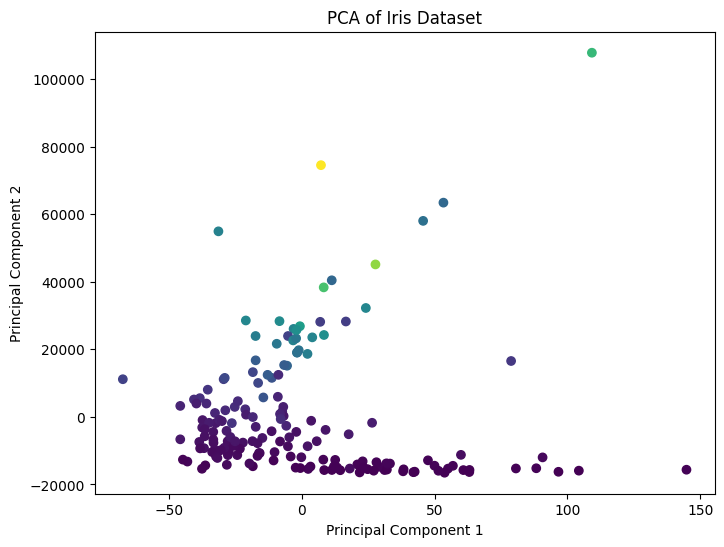

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_reduced[:, 1], X_reduced[:, 0], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
#plt.legend( labels=y)
plt.show()

In [ ]:
import pandas as pd
df = pd.DataFrame(X)

df['target'] = y
df['PC1'] = X_reduced[:, 0]
df['PC2'] = X_reduced[:, 1]

df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,target,PC1,PC2
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-15534.758627,38.293822
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-7214.665598,-27.978643
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-4244.676068,-11.423278
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-11244.756120,59.890866
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1955.347610,-28.860508
...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,-14194.662347,-28.293535
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,-644.680310,-8.000963
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,-12654.632238,-44.836547
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,-12664.708979,8.044802


In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='PC1', y='PC2', z='income', color='target')
fig.show()

In [ ]:
pca =sd.PCA(n_components=3)
X_reduced = pca.fit_transform(X)

df = pd.DataFrame(X)

df['target'] = y
df['PC1'] = X_reduced[:, 0]
df['PC2'] = X_reduced[:, 1]
df['PC3'] = X_reduced[:, 2]

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='target')
fig.show()

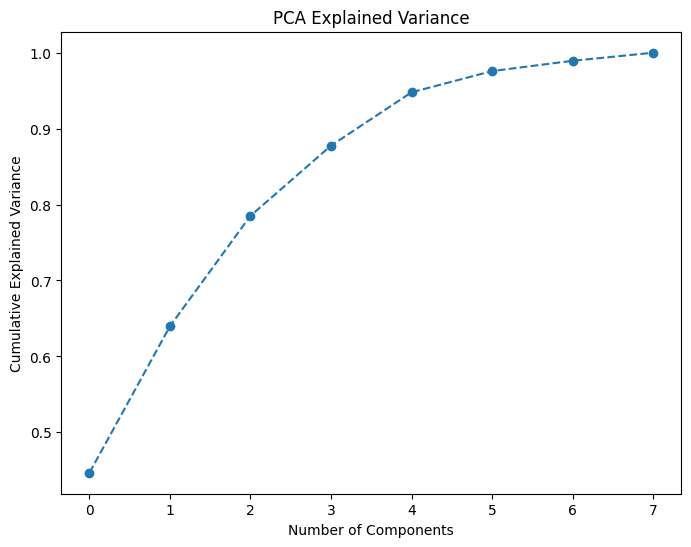

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_full = PCA().fit(X_scaled)

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()